In [144]:
import numpy as np

raw_data = np.genfromtxt('seattleWeather_1948-2017.csv', delimiter=',',names=True,dtype=(list, float, float, float, list))
print(raw_data)

[(b'"1948-01-01"',  0.47,  51.,  42., b'"TRUE"')
 (b'"1948-01-02"',  0.59,  45.,  36., b'"TRUE"')
 (b'"1948-01-03"',  0.42,  45.,  35., b'"TRUE"') ...,
 (b'"2017-12-12"',  0.  ,  46.,  32., b'"FALSE"')
 (b'"2017-12-13"',  0.  ,  48.,  34., b'"FALSE"')
 (b'"2017-12-14"',  0.  ,  50.,  36., b'"FALSE"')]


In [195]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from dnn_app_utils_v2 import *

raw_data = pd.read_csv('seattleWeather_1948-2017.csv')

print(raw_data.values)
print('shape:', raw_data.values.shape)
print('max:',np.max(raw_data.values[:,1:4], axis=0))
print('min:', np.min(raw_data.values[:,1:4], axis=0))

[['1948-01-01' 0.47 51 42 True]
 ['1948-01-02' 0.59 45 36 True]
 ['1948-01-03' 0.42 45 35 True]
 ..., 
 ['2017-12-12' 0.0 46 32 False]
 ['2017-12-13' 0.0 48 34 False]
 ['2017-12-14' 0.0 50 36 False]]
shape: (25551, 5)
max: [3.77 103 71]
min: [0.0 4 0]


In [277]:
raw_data = pd.read_csv('seattleWeather_1948-2017.csv')
# print(raw_data)

# print(np.unique(raw_data['PRCP']))
# print(np.unique(raw_data['TMAX']))
# print(np.unique(raw_data['TMIN']))
# print(np.unique(raw_data['RAIN']))

label = raw_data['RAIN'].apply(lambda x: 1*x)
label = raw_data['RAIN'].apply(lambda x: 0 if np.isnan(x) else 1)

data = raw_data.loc[:,raw_data.columns[1:4]]
data = data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=0)

where_are_nan = np.isnan(data['PRCP'])  
data['PRCP'][where_are_nan] = np.mean(data['PRCP'])

all_data = data
all_data['RAIN'] = label
all_data.describe()

# print(np.unique(all_data['PRCP']))
# print(np.unique(all_data['TMAX']))
# print(np.unique(all_data['TMIN']))
# print(np.unique(all_data['RAIN']))

,PRCP,TMAX,TMIN,RAIN
count,25551.000000,25551.000000,25551.000000,25551.000000
mean,0.021160,0.561053,0.626961,0.999883
std,0.047613,0.129020,0.125251,0.010835
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.464646,0.535211,1.000000
50%,0.000000,0.545455,0.633803,1.000000
75%,0.019920,0.656566,0.732394,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [278]:
train_data, test_data = train_test_split(all_data,test_size=0.1, random_state=0)
# print(train_data.shape)
# print(test_data.shape)

# print(train_data)
# print(test_data)


train_x = train_data.values[:, 0:3].T
train_y = train_data.values[:, 3].reshape(1, -1)
test_x = test_data.values[:, 0:3].T
test_y = test_data.values[:, 3].reshape(1, -1)

# Explore your dataset 
m_train = train_data.shape[0]
m_test = test_data.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))



Number of training examples: 22995
Number of testing examples: 2556
train_x shape: (3, 22995)
train_y shape: (1, 22995)
test_x shape: (3, 2556)
test_y shape: (1, 2556)


In [279]:
# GRADED FUNCTION: L_layer_model
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    print(X.shape)
    print(Y.shape)
    print(X)
    print(Y)

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

(3, 22995)
(1, 22995)
[[ 0.          0.          0.02191235 ...,  0.00996016  0.          0.00398406]
 [ 0.71717172  0.80808081  0.64646465 ...,  0.48484848  0.72727273
   0.65656566]
 [ 0.67605634  0.78873239  0.73239437 ...,  0.54929577  0.78873239
   0.69014085]]
[[ 1.  1.  1. ...,  1.  1.  1.]]
Cost after iteration 0: 0.702292
Cost after iteration 100: 0.475512
Cost after iteration 200: 0.331294
Cost after iteration 300: 0.225920
Cost after iteration 400: 0.151541
Cost after iteration 500: 0.101927
Cost after iteration 600: 0.070107
Cost after iteration 700: 0.049879
Cost after iteration 800: 0.036822
Cost after iteration 900: 0.028153
Cost after iteration 1000: 0.022210
Cost after iteration 1100: 0.018003
Cost after iteration 1200: 0.014934
Cost after iteration 1300: 0.012636
Cost after iteration 1400: 0.010874
Cost after iteration 1500: 0.009495
Cost after iteration 1600: 0.008395
Cost after iteration 1700: 0.007505
Cost after iteration 1800: 0.006773
Cost after iteration 1900: 0

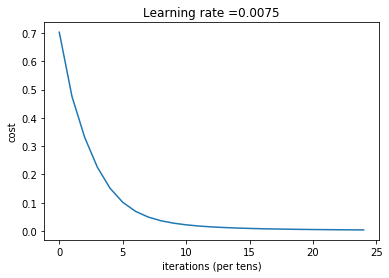

In [282]:
### CONSTANTS DEFINING THE MODEL ####
layers_dims = [3, 5, 10, 5, 1]

parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [283]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.999869536856


In [284]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 1.0
